# RNN - Model

This Notebook will be used to create and iterate over our RNN - Model to predict Memecoin Prices.

### Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

### Data

In [ ]:
url_train = 'https://raw.githubusercontent.com/TatevKaren/recurrent-neural-network-pricing-model/main/bitcoin_data/Bitcoin_Stock_Price_Trainset.csv'
url_test = 'https://raw.githubusercontent.com/TatevKaren/recurrent-neural-network-pricing-model/main/bitcoin_data/Bitcoin_Stock_Price_Testset.csv'

df_train = pd.read_csv(url_train,index_col=0,parse_dates=[0])
df_test = pd.read_csv(url_test,index_col=0,parse_dates=[0])

In [ ]:
df_train.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900
2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600
2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800
2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500
2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1823 entries, 2016-01-01 to 2020-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1823 non-null   float64
 1   High       1823 non-null   float64
 2   Low        1823 non-null   float64
 3   Close      1823 non-null   float64
 4   Adj Close  1823 non-null   float64
 5   Volume     1823 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 99.7 KB


In [ ]:
training_set = df_train.iloc[:,1:2].values

In [ ]:
# only using "high" column for prediction
training_set

array([[  436.246002],
       [  436.062012],
       [  433.743011],
       ...,
       [27370.7207  ],
       [28937.74023 ],
       [29244.87695 ]])

## Scaling

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
scaler = RobustScaler()

training_set_sc = scaler.fit_transform(training_set)

In [47]:
X_train = []
y_train = []

for i in range(90, training_set_sc.shape[0]):
  X_train.append(training_set_sc[i-90:i,0])
  y_train.append(training_set_sc[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [48]:
X_train.shape

(1733, 90)

# Modeling

In [49]:
regressor = Sequential()

# LSTM layer 1
regressor.add(LSTM(units = 50, return_sequences=True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# LSTM layer 2,3,4
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))

# LSTM layer 5
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Fully connected layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Specifying Early Stopping Criterion
es = EarlyStopping(patience= 4, restore_best_weights=True)

#Fitting the RNN model
regressor.fit(X_train, 
              y_train, 
              epochs = 20, 
              batch_size = 32,
              callbacks= [es])

Epoch 1/20
55/55 [==============================] - 18s 135ms/step - loss: 0.0796
Epoch 2/20
55/55 [==============================] - 7s 134ms/step - loss: 0.0344
Epoch 3/20
55/55 [==============================] - 7s 134ms/step - loss: 0.0269
Epoch 4/20
55/55 [==============================] - 7s 135ms/step - loss: 0.0214
Epoch 5/20
55/55 [==============================] - 7s 135ms/step - loss: 0.0232
Epoch 6/20
55/55 [==============================] - 7s 135ms/step - loss: 0.0203
Epoch 7/20
55/55 [==============================] - 7s 135ms/step - loss: 0.0175
Epoch 8/20
55/55 [==============================] - 7s 135ms/step - loss: 0.0179
Epoch 9/20
55/55 [==============================] - 7s 134ms/step - loss: 0.0159
Epoch 10/20
55/55 [==============================] - 7s 135ms/step - loss: 0.0157
Epoch 11/20
55/55 [==============================] - 7s 135ms/step - loss: 0.0164
Epoch 12/20
55/55 [==============================] - 7s 133ms/step - loss: 0.0180
Epoch 13/20
55/55 [=====

In [57]:
df_test.iloc[:,1:2]

,High
Date,
2021-01-01,29600.62695
2021-01-02,33155.11719
2021-01-03,34608.55859
2021-01-04,33440.21875
2021-01-05,34437.58984
2021-01-06,36879.69922
2021-01-07,40180.36719
2021-01-08,41946.73828
2021-01-09,41436.35156


[[29600.62695]
 [33155.11719]
 [34608.55859]
 [33440.21875]
 [34437.58984]
 [36879.69922]
 [40180.36719]
 [41946.73828]
 [41436.35156]
 [41420.19141]
 [38346.53125]
 [36568.52734]
 [37599.96094]
 [39966.40625]
 [39577.71094]
 [37864.36719]
 [36722.35156]
 [37299.28516]
 [37755.89063]
 [36378.32813]
 [35552.67969]
 [33811.85156]
 [33360.97656]
 [32944.00781]
 [34802.74219]
 [32794.55078]
 [32564.0293 ]
 [31891.30078]
 [38406.26172]
 [34834.70703]
 [34288.33203]
 [34638.21484]
 [35896.88281]
 [37480.1875 ]
 [38592.17578]
 [38225.90625]
 [40846.54688]
 [39621.83594]
 [46203.92969]
 [48003.72266]
 [47145.56641]
 [48463.46875]
 [48745.73438]
 [48047.74609]
 [49487.64063]
 [48875.57031]
 [50341.10156]
 [52533.91406]
 [52474.10547]
 [56113.65234]
 [57505.22656]
 [58330.57031]
 [57533.39063]
 [54204.92969]
 [51290.13672]
 [51948.96875]
 [48370.78516]
 [48253.26953]
 [46716.42969]
 [        nan]]
First Financial day in 2021, when testing period begins 1823
First Financial day in 2021 minus 60 d

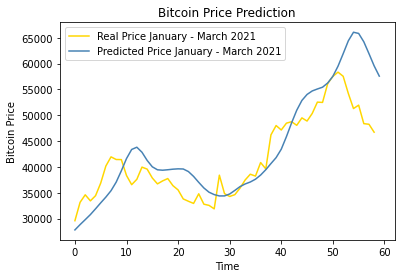

In [50]:
real_stock_price = df_test.iloc[:,1:2].values
# predicting the stock prices using X_test
# we need the original training data (vertical concatination 0, horizontal 1)
dataset_total = pd.concat((df_train['Open'], df_test['Open']), axis = 0)

# for the consistence of the model we need to have the same scaling on the test as on the training
# for the first test day we need the previous 60 days data from train
print("First Financial day in 2021, when testing period begins",len(dataset_total)- len(df_test))
print("First Financial day in 2021 minus 60 days",len(dataset_total)- len(df_test) - 90)
inputs = dataset_total[len(dataset_total) - len(df_test) - 90:].values

# reshaping,normalizing the inputs
inputs = inputs.reshape(-1,1)
# no longer fitting but just transforming
inputs = sc.transform(inputs)


#storing test data as we did in teh training
X_test = []
for i in range(90,inputs.size):
    X_test.append(inputs[i-90:i, 0])
X_test = np.array(X_test)
#adding extra dimension
X_test = np.reshape(X_test, [X_test.shape[0], X_test.shape[1], 1])

#obtaining predicted values
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

#--------------------- Visualizing the RNN model results--------------------#
plt.plot(real_stock_price, color = '#ffd700', label = "Real Price January - March 2021")
plt.plot(predicted_stock_price, color = '#4782B4', label = "Predicted Price January - March 2021")
plt.title("Bitcoin Price Prediction")
plt.xlabel("Time")
plt.ylabel("Bitcoin Price")
plt.legend()
plt.show()


In [52]:
real_stock_price.shape

(60, 1)